In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from sklearn.cluster import AffinityPropagation

from sklearn.metrics import silhouette_samples, silhouette_score

import scipy.stats as stats

from mpl_toolkits.mplot3d import Axes3D 

In [2]:
df = pd.read_csv('german_credit_data.csv')
df

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car
...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment
996,996,40,male,3,own,little,little,3857,30,car
997,997,38,male,2,own,little,NaN,804,12,radio/TV
998,998,23,male,2,free,little,little,1845,45,radio/TV


In [3]:
df.drop(df.columns[0], axis=1, inplace=True)
df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car
...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,1736,12,furniture/equipment
996,40,male,3,own,little,little,3857,30,car
997,38,male,2,own,little,NaN,804,12,radio/TV
998,23,male,2,free,little,little,1845,45,radio/TV


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


In [5]:
# Descript data per features (kolom)
list_item = []
for col in df.columns:
    list_item.append([col, df[col].dtype, df[col].isna().sum(), round(df[col].isna().sum()/len(df)*100, 2), df[col].nunique(),
                     df[col].unique()[:4]])
desc_df = pd.DataFrame(data=list_item, columns='features dtype null null% nunique unique_sample'.split())
desc_df

,features,dtype,null,null%,nunique,unique_sample
0,Age,int64,0,0.0,53,"[67, 22, 49, 45]"
1,Sex,object,0,0.0,2,"[male, female]"
2,Job,int64,0,0.0,4,"[2, 1, 3, 0]"
3,Housing,object,0,0.0,3,"[own, free, rent]"
4,Saving accounts,object,183,18.3,4,"[nan, little, quite rich, rich]"
5,Checking account,object,394,39.4,3,"[little, moderate, nan, rich]"
6,Credit amount,int64,0,0.0,921,"[1169, 5951, 2096, 7882]"
7,Duration,int64,0,0.0,33,"[6, 48, 12, 42]"
8,Purpose,object,0,0.0,8,"[radio/TV, education, furniture/equipment, car]"


In [6]:
# Checking all data whether there's a data error?
for i in df.columns:
    print("Column:",i)
    display(df[i].value_counts())

Column: Age


27    51
26    50
23    48
24    44
28    43
25    41
35    40
30    40
36    39
31    38
29    37
32    34
33    33
34    32
37    29
22    27
40    25
38    24
42    22
39    21
46    18
41    17
43    17
44    17
47    17
45    15
21    14
49    14
20    14
48    12
50    12
54    10
52     9
57     9
55     8
63     8
51     8
53     7
61     7
60     6
58     5
64     5
65     5
66     5
74     4
67     3
68     3
56     3
59     3
75     2
62     2
19     2
70     1
Name: Age, dtype: int64

Column: Sex


male      690
female    310
Name: Sex, dtype: int64

Column: Job


2    630
1    200
3    148
0     22
Name: Job, dtype: int64

Column: Housing


own     713
rent    179
free    108
Name: Housing, dtype: int64

Column: Saving accounts


little        603
moderate      103
quite rich     63
rich           48
Name: Saving accounts, dtype: int64

Column: Checking account


little      274
moderate    269
rich         63
Name: Checking account, dtype: int64

Column: Credit amount


1258    3
1478    3
1275    3
1393    3
1262    3
       ..
1345    1
1343    1
7485    1
3345    1
2051    1
Name: Credit amount, Length: 921, dtype: int64

Column: Duration


24    184
12    179
18    113
36     83
6      75
15     64
9      49
48     48
30     40
21     30
10     28
27     13
60     13
42     11
11      9
20      8
8       7
4       6
39      5
45      5
7       5
14      4
13      4
33      3
28      3
22      2
16      2
54      2
26      1
40      1
47      1
5       1
72      1
Name: Duration, dtype: int64

Column: Purpose


car                    337
radio/TV               280
furniture/equipment    181
business                97
education               59
repairs                 22
vacation/others         12
domestic appliances     12
Name: Purpose, dtype: int64

In [7]:
list_obj = desc_df[desc_df['dtype']=='object']['features'].tolist()
list_int = desc_df[desc_df['dtype']=='int64']['features'].tolist()
list_int

['Age', 'Job', 'Credit amount', 'Duration']

## Exploratory Data Analysis

In [8]:
def scatters(data, h=None, pal=None):
    fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(8,8))
    sns.scatterplot(x="Credit amount",y="Duration", hue=h, palette=pal, data=data, ax=ax1)
    sns.scatterplot(x="Age",y="Credit amount", hue=h, palette=pal, data=data, ax=ax2)
    sns.scatterplot(x="Age",y="Duration", hue=h, palette=pal, data=data, ax=ax3)
    plt.tight_layout()
#     plt.show()

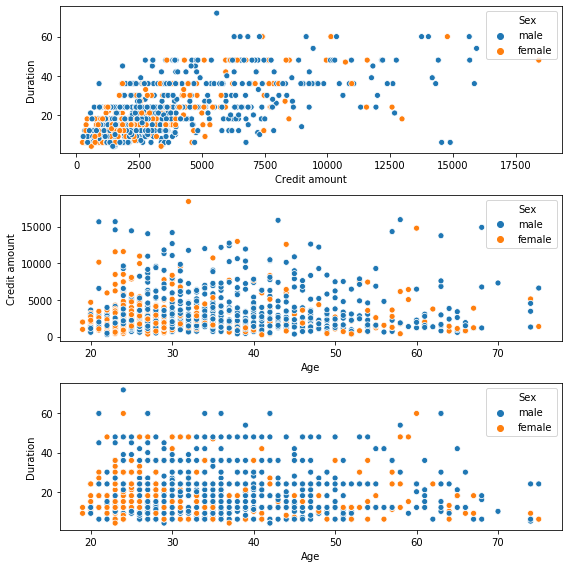

In [9]:
scatters(df, "Sex")

The general impression is that women tend to be younger than men, however, the top plot shows that there is no clear difference between men and women in terms of amount and duration of the credit. From visual inspection, it seems that there is some positive correlation between duration and amount of credit, what makes sense.

Let’s check the linear correlation between credit amount and duration

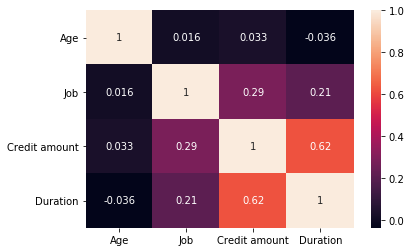

In [10]:
sns.heatmap(df[list_int].corr(), annot=True)

C:\Users\Asyraf\anaconda3\lib\site-packages\seaborn\axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


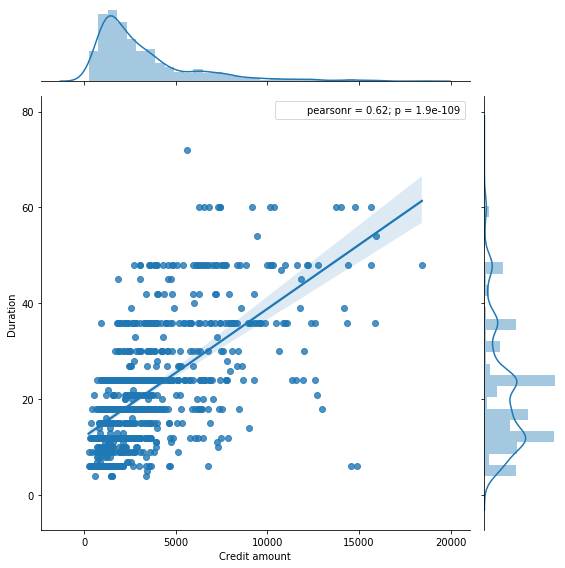

In [11]:
r1 = sns.jointplot(x="Credit amount", y="Duration", data=df, kind="reg", height=8)
r1.annotate(stats.pearsonr)
plt.show()

The plot above shows a linear correlation with Pearson value of 0.62 and very small p-value. That make’s sense because usually, people take bigger credits for longer periods. Below I will analyse linear regression plots with various categorisations.

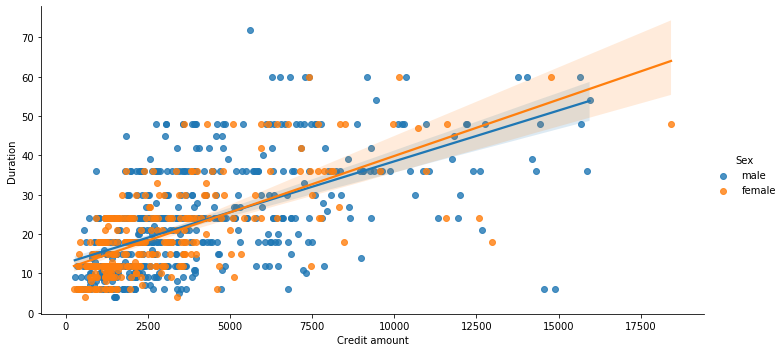

In [12]:
# sns.lmplot(x="Credit amount",y="Duration", hue="Sex", data=data, palette="Set1", aspect=2)
sns.lmplot(x="Credit amount",y="Duration", hue="Sex", data=df, palette=None, aspect=2)
plt.show()

The plot above indicates that there is no significant difference between men and women.

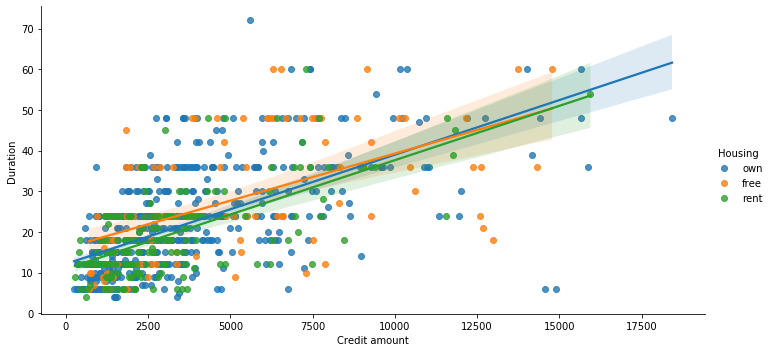

In [13]:
sns.lmplot(x="Credit amount",y="Duration", hue="Housing", data=df, palette=None, aspect=2)
plt.show()

The plot above shows similarly that there is no diference betwen housing categories.

Below I will show “business” area where granted the biggest amount of credits.

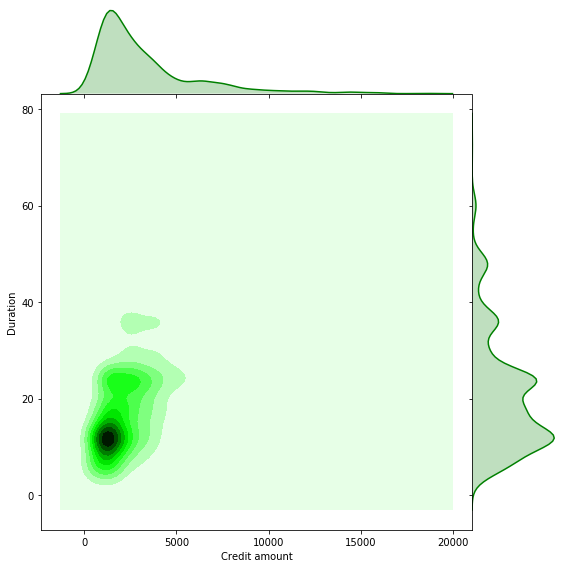

In [14]:
sns.jointplot("Credit amount","Duration", data=df, kind="kde", space=0, color="g",  height=8)
plt.show()

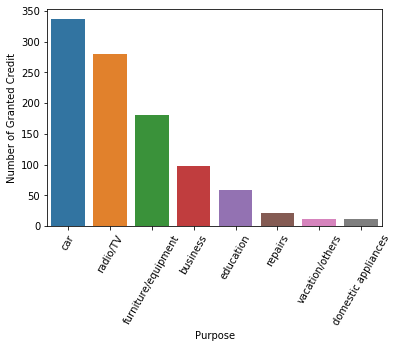

In [15]:
df_by_pur = df.groupby('Purpose')
# dfp = df_by_pur['Credit amount'].count().to_frame().reset_index()['Credit amount'].sort_values(ascending=False)
dfp = df_by_pur['Credit amount'].count().sort_values(ascending=False).to_frame().reset_index()
dfp

sns.barplot(x='Purpose', y='Credit amount', data=dfp)
plt.xticks(rotation=60)
plt.ylabel('Number of Granted Credit') # Jumlah banyaknya kredit (Bukan jumlah nilai kreditnya)
plt.show()

The barplot above shows how many credits were granted for various purposes. Most of credits were granted for car and radio/TV.

Now I will generate boxplots for detailed analysis of categorical variables.

In [16]:
def boxes(x,y,h,r=45):
    plt.figure(figsize=(10,5))
    sns.boxplot(x=x, y=y, hue=h, data=df)
    plt.xticks(rotation=r)
    plt.show()
#     plt.tight_layout()

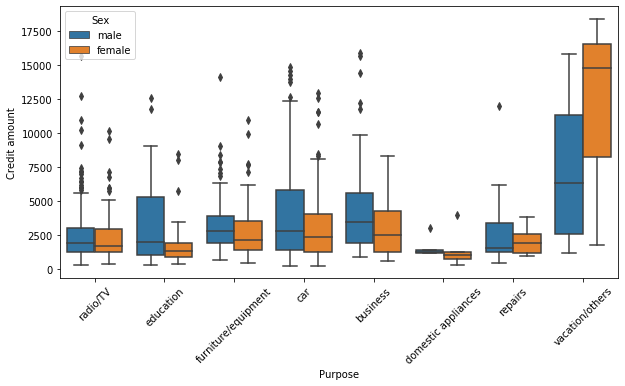

In [17]:
boxes("Purpose","Credit amount","Sex")

The plot above shows that the biggest amounts are taken for vacations/others, the smallest for domestic appliances. Most of them have outliers on the upper side of the boxes (higher amounts). In most of the cases there is no difference between men and women, despite category vacation/others. But one must remember that there was very little number of credits granted in this category.

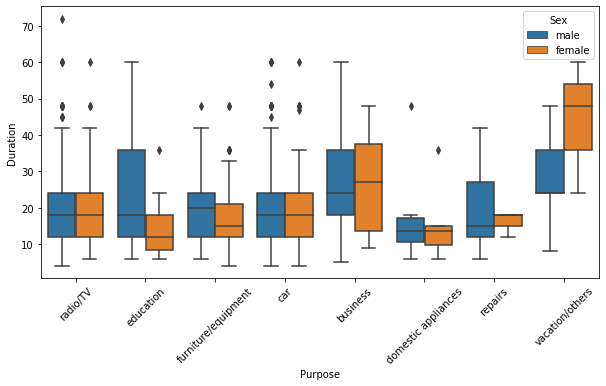

In [18]:
boxes("Purpose","Duration","Sex")

The boxplot above indicates that generally there is no difference in credit duration between men and women. We can’t see also clear trend between categories with observations that the shortest duration is for domestic appliances. It makes sense as it is in agreement with insights from the previous graph (credit amount) – in this category, there are the lowest amounts of credits.

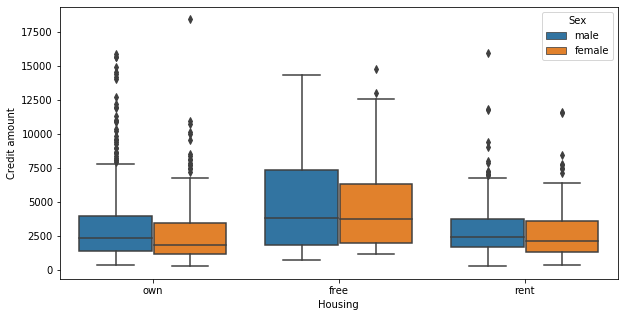

In [19]:
boxes("Housing","Credit amount","Sex",r=0)

In terms of housing category, there is no big difference despite people having “free” housing tend to take slightly bigger credit amounts.

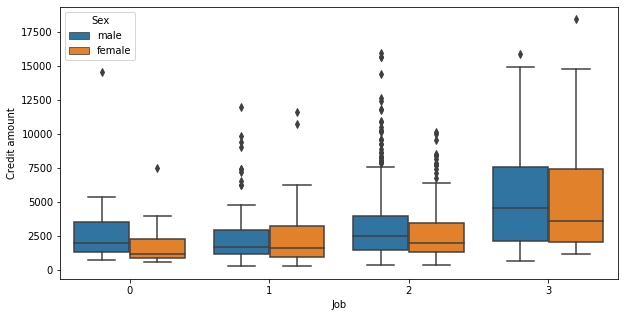

In [20]:
boxes("Job","Credit amount","Sex",r=0)

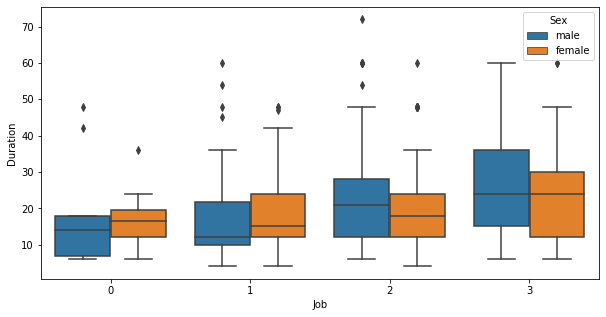

In [21]:
boxes("Job","Duration","Sex",r=0)

In terms of job category once again there is no difference between men and women, but we can see that job category 3 tends to take bigger credit amounts for longer duration.

And here is the 3D plots.

Text(0.5, 0, 'Age')

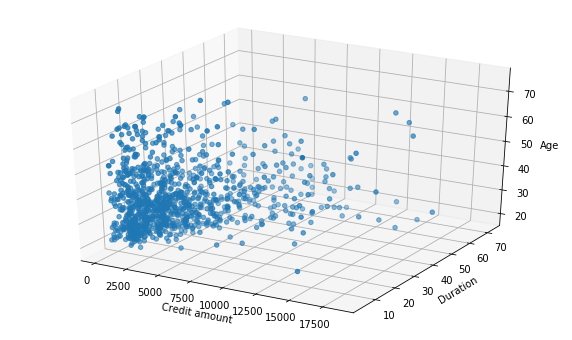

In [22]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df["Credit amount"], df["Duration"], df["Age"])
ax.set_xlabel("Credit amount")
ax.set_ylabel("Duration")
ax.set_zlabel("Age")

## Clustering with KMeans
For clustering, I will create a subset containing only numerical variables (Age, Credit amount, Duration).

In [23]:
df_acd = df[['Age', 'Credit amount', 'Duration']]
df_acd

,Age,Credit amount,Duration
0,67,1169,6
1,22,5951,48
2,49,2096,12
3,45,7882,42
4,53,4870,24
...,...,...,...
995,31,1736,12
996,40,3857,30
997,38,804,12
998,23,1845,45


In [24]:
def distributions(df):
    fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(8,8))
    sns.distplot(df["Age"], ax=ax1)
    sns.distplot(df["Credit amount"], ax=ax2)
    sns.distplot(df["Duration"], ax=ax3)
    plt.tight_layout()

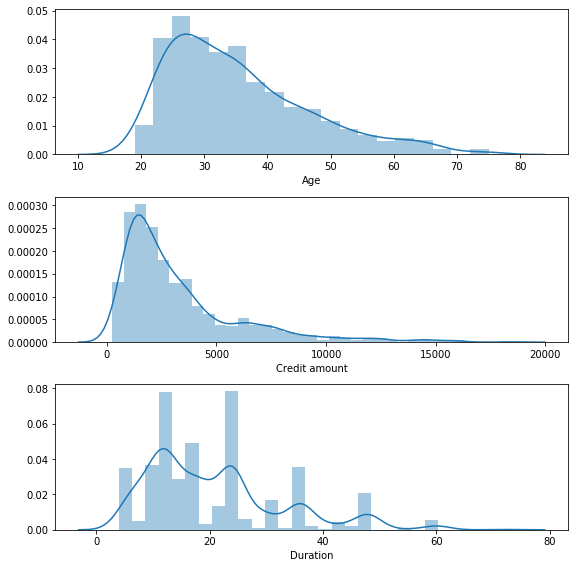

In [25]:
distributions(df_acd)

We can see that distributions are right-skewed. To obtain better results we should remove the skewness by logarithmic transformation. After that let's see how they look like.

In [26]:
df_acd_log = np.log(df_acd)
df_acd_log

,Age,Credit amount,Duration
0,4.204693,7.063904,1.791759
1,3.091042,8.691315,3.871201
2,3.891820,7.647786,2.484907
3,3.806662,8.972337,3.737670
4,3.970292,8.490849,3.178054
...,...,...,...
995,3.433987,7.459339,2.484907
996,3.688879,8.257645,3.401197
997,3.637586,6.689599,2.484907
998,3.135494,7.520235,3.806662


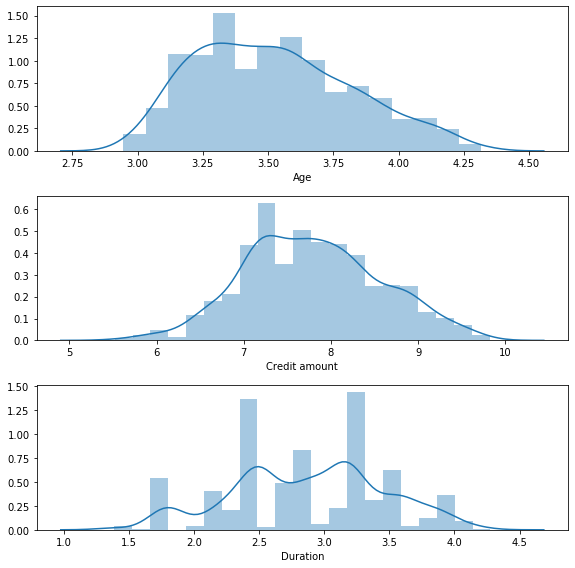

In [27]:
distributions(df_acd_log)

Indeed, the skewness has been eliminated.

The next step will be centering and scaling of variables – it is required by KMeans algorithm. We will use for that a StandardScaler from sklearn library.

In [28]:
scaler = StandardScaler()
df_acd_scaled = scaler.fit_transform(df_acd_log)
df_acd_scaled

array([[ 2.27100592, -0.933901  , -1.86486906],
       [-1.44615223,  1.16304581,  1.7083687 ],
       [ 1.22669602, -0.1815588 , -0.67378981],
       ...,
       [ 0.37810951, -1.4161991 , -0.67378981],
       [-1.29778048, -0.34591111,  1.59746802],
       [-0.76258638,  0.82450846,  1.59746802]])

I will check how inertia changes for various number of clusters.

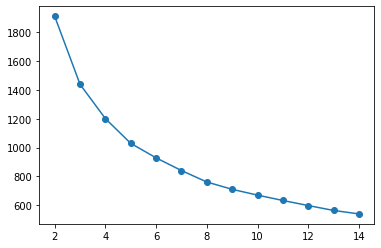

In [29]:
clusters_range = [2,3,4,5,6,7,8,9,10,11,12,13,14]
inertias =[]

for c in clusters_range:
    kmeans = KMeans(n_clusters=c, random_state=0).fit(df_acd_scaled)
    inertias.append(kmeans.inertia_)

plt.figure()
plt.plot(clusters_range, inertias, marker='o')

The plot above shows that inertia decreases with increasing number of clusters.

This method allows for assessment of cluster separations and fitting of each observation in its own cluster. The highest score the better. I will perform this analysis for various seeds as well.

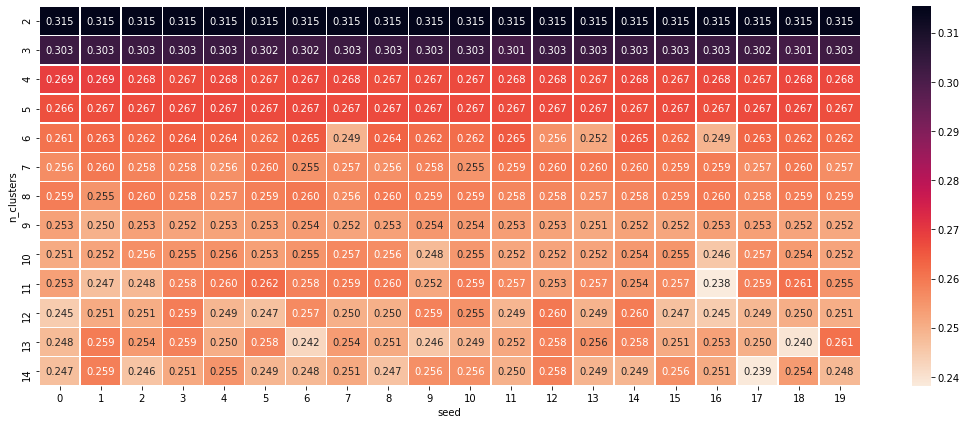

In [30]:
clusters_range = range(2,15)
random_range = range(0,20)
results =[]
for c in clusters_range:
    for r in random_range:
        clusterer = KMeans(n_clusters=c, random_state=r)
        cluster_labels = clusterer.fit_predict(df_acd_scaled)
        silhouette_avg = silhouette_score(df_acd_scaled, cluster_labels)
        #print("For n_clusters =", c," and seed =", r,  "\nThe average silhouette_score is :", silhouette_avg)
        results.append([c,r,silhouette_avg])

result = pd.DataFrame(results, columns=["n_clusters","seed","silhouette_score"])
pivot_km = pd.pivot_table(result, index="n_clusters", columns="seed",values="silhouette_score")

plt.figure(figsize=(15,6))
sns.heatmap(pivot_km, annot=True, linewidths=.5, fmt='.3f', cmap=sns.cm.rocket_r)
plt.tight_layout()

The heatmap above shows silhouette scores for various combinations of random state and number of clusters. The highest scores are for 2 and 3 clusters and they are relatively insensitive to seed.

I will chose 3 clusters to get more insight into data.

In [31]:
kmeans_sel = KMeans(n_clusters=3, random_state=1).fit(df_acd_scaled)
labels = pd.DataFrame(kmeans_sel.labels_)
clustered_data = df_acd.assign(Cluster=labels)
clustered_data

,Age,Credit amount,Duration,Cluster
0,67,1169,6,1
1,22,5951,48,0
2,49,2096,12,1
3,45,7882,42,0
4,53,4870,24,0
...,...,...,...,...
995,31,1736,12,2
996,40,3857,30,0
997,38,804,12,1
998,23,1845,45,0


Below I will create silhouette graph for 3 clusters in order to visually depict fit of each point within its own cluster (modified code from scikit-learn doc).

For n_clusters = 3  and seed = 19 
The average silhouette_score is : 0.30318933408774545


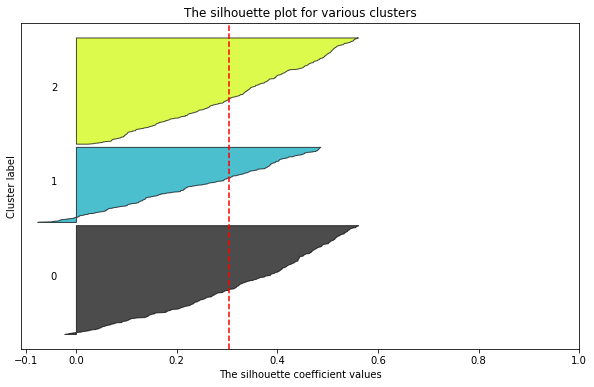

In [32]:
clusterer = KMeans(n_clusters=3, random_state=1)
cluster_labels = clusterer.fit_predict(df_acd_scaled)
silhouette_avg = silhouette_score(df_acd_scaled, cluster_labels)
print("For n_clusters =", 3," and seed =", r,  "\nThe average silhouette_score is :", silhouette_avg)

# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(df_acd_scaled, cluster_labels)

fig, ax1 = plt.subplots(figsize=(10,6))

y_lower = 10
for i in range(3):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    
    color = cm.nipy_spectral(float(i) / 3)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),0, ith_cluster_silhouette_values, facecolor=color, edgecolor="black", alpha=0.7)
    
    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    
    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.get_yaxis().set_ticks([])
ax1.set_title("The silhouette plot for various clusters")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")
# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

I will define a function showing clusters on the scatter plot.

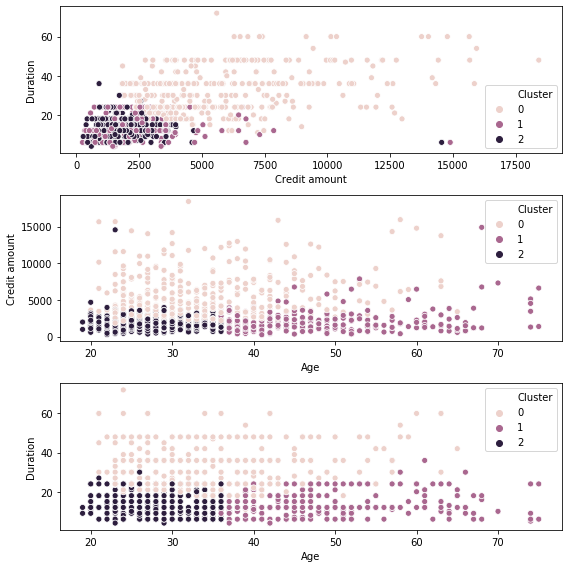

In [33]:
scatters(clustered_data, 'Cluster')

Plots above show three created clusters. Two bottom ones show relatively clear separation of clusters, but it is no so evident on the top one.

I will generate now a heatmap plot for easier business interpretation of customer segmentation.

In [34]:
grouped_km = clustered_data.groupby(['Cluster']).mean().round(1)
grouped_km

,Age,Credit amount,Duration
Cluster,,,
0,34.0,5665.4,32.2
1,48.7,1979.7,13.9
2,27.8,1732.2,14.2


Cluster 0 – high mean of credit amount, long duration, middle-aged customers

Cluster 1 – lower mean of credit amount, short duration, older customers

Cluster 2 - lower mean of credit amount, short duration, young customers

## Clustering with Affinity Propagation
In this algorithm there are two relevant parameters: preference and dumping. It means that we don’t define upfront number of clusters, algorithm itself chooses their number. I will fix dumping and check number of clusters in function of preference parameter.

C:\Users\Asyraf\anaconda3\lib\site-packages\sklearn\cluster\_affinity_propagation.py:152: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 0.25 which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  FutureWarning)
C:\Users\Asyraf\anaconda3\lib\site-packages\sklearn\cluster\_affinity_propagation.py:152: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 0.25 which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  FutureWarning)
C:\Users\Asyraf\anaconda3\lib\site-packages\sklearn\cluster\_affinity_propagation.py:152: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 0.25 which means that results will differ at every function call. Set 'rando

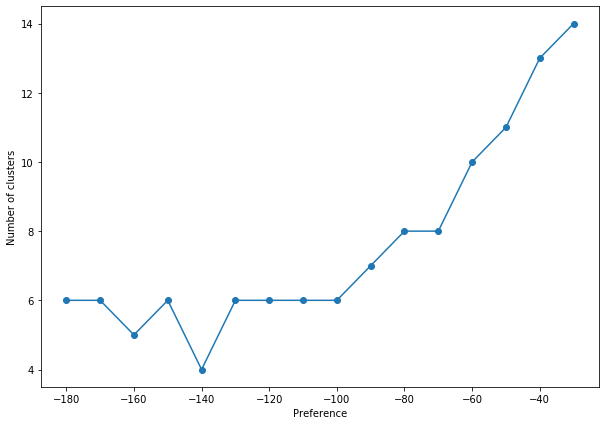

In [35]:
preferences = np.arange(-30,-190,-10)
clusters = []

for p in preferences:
    af = AffinityPropagation(preference=p, damping=0.6, max_iter=400, verbose=False).fit(df_acd_scaled)
    labels_af = pd.DataFrame(af.labels_)
    clusters.append(len(af.cluster_centers_indices_))

plt.figure(figsize=(10,7))
plt.xlabel("Preference")
plt.ylabel("Number of clusters")
plt.plot(preferences,clusters, marker='o')

Together with decreasing value of preference parameter, number of clusters goes down as well and levels for very small preference values. I will check for clusters option.

C:\Users\Asyraf\anaconda3\lib\site-packages\sklearn\cluster\_affinity_propagation.py:152: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 0.25 which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  FutureWarning)


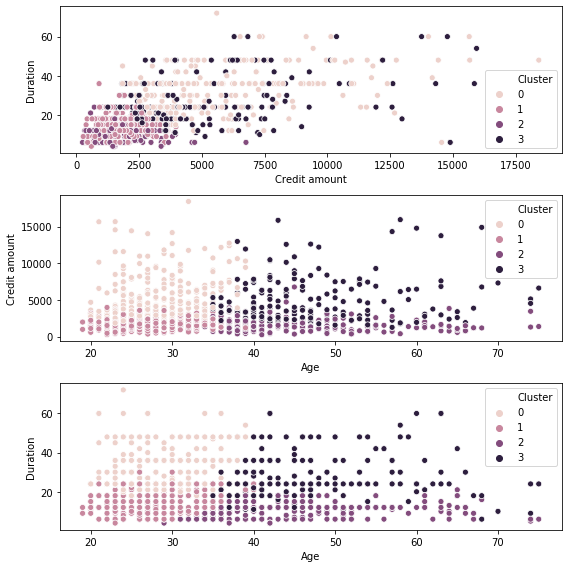

In [36]:
af = AffinityPropagation(preference=-140, damping=0.6, verbose=False).fit(df_acd_scaled)
labels_af = pd.DataFrame(af.labels_)
n_clusters_ = len(af.cluster_centers_indices_)

clustered_data_af = df_acd.assign(Cluster=labels_af)
scatters(clustered_data_af,'Cluster')

grouped_af = clustered_data_af.groupby(['Cluster']).mean().round(1)

In [37]:
grouped_af = clustered_data_af.groupby(['Cluster']).mean().round(1)
grouped_af

,Age,Credit amount,Duration
Cluster,,,
0,28.7,5593.7,32.2
1,27.9,1654.3,15.1
2,46.0,1551.7,10.7
3,47.5,4977.9,27.6


Cluster 0 – high mean of credit amount, long duration, younger customers

Cluster 1 – low mean of credit amount, short duration, younger customers

Cluster 2 - low mean of credit amount, short duration, older customers

Cluster 3 - high mean of credit amount, middle-time duration, older customers